In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk
import plotly.express as px
import altair as alt

Loading four different olist files

In [163]:
geo = pd.read_csv(r"C:\Users\salon\Desktop\olist_data\olist_geolocation_dataset.csv")

In [164]:
orders = pd.read_csv(r"C:\Users\salon\Desktop\olist_data\olist_orders_dataset.csv")

In [165]:
payments = pd.read_csv(r"C:\Users\salon\Desktop\olist_data\olist_order_payments_dataset.csv")

In [166]:
feedbacks = pd.read_csv(r"C:\Users\salon\Desktop\olist_data\olist_order_reviews_dataset.csv")

Merging all the datasets into a single csv file

In [167]:
dfs = pd.concat([geo, orders, payments, feedbacks], axis=1)

# Visually Inspection of the dataset

In [168]:
dfs.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,payment_installments,payment_value,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1037,-23.545621,-46.639292,sao paulo,SP,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,...,credit_card,8.0,99.33,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4.0,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,1046,-23.546081,-46.644820,sao paulo,SP,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,...,credit_card,1.0,24.39,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5.0,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,1046,-23.546129,-46.642951,sao paulo,SP,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,...,credit_card,1.0,65.71,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5.0,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,1041,-23.544392,-46.639499,sao paulo,SP,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,...,credit_card,8.0,107.78,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5.0,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,1035,-23.541578,-46.641607,sao paulo,SP,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,...,credit_card,2.0,128.45,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [169]:
dfs.shape

(1000163, 25)

In [170]:
#Let's search for NA values
print(dfs.isnull().sum())

geolocation_zip_code_prefix           0
geolocation_lat                       0
geolocation_lng                       0
geolocation_city                      0
geolocation_state                     0
order_id                         900722
customer_id                      900722
order_status                     900722
order_purchase_timestamp         900722
order_approved_at                900882
order_delivered_carrier_date     902505
order_delivered_customer_date    903687
order_estimated_delivery_date    900722
order_id                         896277
payment_sequential               896277
payment_type                     896277
payment_installments             896277
payment_value                    896277
review_id                        900163
order_id                         900163
review_score                     900163
review_comment_title             988448
review_comment_message           958410
review_creation_date             900163
review_answer_timestamp          900163


OMG!! It looks something wrong with datasets because except the first file (e.g. geo) all the other files seems to have lots of NA value. Let's deep dive before omiting or droping the values.

In [171]:
dfs.tail()
original = dfs

Okay!! My fault..those NA values shows, people doesnot order from olist store of that particular area. hence, its safe to remove.
Let's drop the rows with no orders

In [172]:
df = dfs.dropna()

In [173]:
df.shape

(9651, 25)

In [174]:
df.tail()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,payment_type,payment_installments,payment_value,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
99365,4635,-23.642247,-46.670371,sao paulo,SP,18feb354fd368bc9d6cd27c5359e2243,c8aa0375ea97096fa716aeb0fae33604,delivered,2018-03-01 10:24:19,2018-03-01 10:35:43,...,credit_card,1.0,36.22,d660c23fe2741d487e24bd72608f8c4e,453a132be6c4bc81afa3196c3851a133,5.0,excelente loja.,"Variedades nos produtos, de qualidade, cumprin...",2018-05-03 00:00:00,2018-05-07 11:19:30
99394,4675,-23.673388,-46.697136,sao paulo,SP,079c9f53e6c3253320db701a645b0b9a,e5e0698e95094be297436cbd55c2dcad,delivered,2018-08-09 20:33:45,2018-08-09 20:50:17,...,credit_card,4.0,213.34,85aa0d297746bbfbdefb9053f849738f,321c2c691df365d1219bbd6cd6257f11,5.0,Entregue com rapidez,Entregue com rapidez e o produto é muito bom,2018-04-29 00:00:00,2018-05-02 14:07:21
99417,4673,-23.665297,-46.695290,sao paulo,SP,e6cc57f923c4dab2222b8c9aa8742eea,2f4a42f9bb4b9a8cd402fa549df5c7fd,delivered,2018-02-07 12:09:45,2018-02-07 12:31:13,...,credit_card,1.0,32.10,75409037b6d31b5c0a20df9980bf108b,947e9c6bfd83a06953c420ef92d3da6e,4.0,recomendo sim,"o produto apresentou defeito, mas assistência ...",2018-08-15 00:00:00,2018-08-16 15:05:25
99418,4662,-23.654344,-46.690854,são paulo,SP,788541a19c0791de0504c5a9cb7e7bd5,a537aaf902d2f436eb7f44817154bb68,delivered,2017-11-30 17:54:28,2017-11-30 18:16:25,...,credit_card,1.0,93.72,720ff16eb1247a524f0207c6abcea829,47241d51bf3749ec7ad04962507ac2df,5.0,Excelente,Amei o produto... A entrega nunca vi tão rápid...,2018-08-05 00:00:00,2018-08-05 22:25:36
99436,4661,-23.663797,-46.678596,sao paulo,SP,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,...,credit_card,2.0,43.70,ba5d32db98e447802513ec268c0d1b9c,d94600e5b855ffe8db3b9bc06e21b1bd,1.0,BOM,PRODUTO PARECE QUE JA FOI UTILIZADO FEIO TUDO ...,2018-08-01 00:00:00,2018-08-02 15:23:53


Okay, We do not have anyother NA values, I already crosscheck about different variety of missing alues e.g. 0, - , blanks, etc from local MS excel software. If it is present then i must hae to create a list of missing value types and then drop the rows/columns manually.

I'm not sure weather my data contains point out of brazelian coordinates or not, but for the safe side. I'll define the ranges of brazil and remove the further outliers

In [175]:
#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
df = df[df.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
df = df[df.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
df = df[df.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
df = df[df.geolocation_lng <=  -34.79314722]

Longitude and latitude is mandatory to plot any map, and the name of colummns must be either longitude and latitude or lng and lat. Hence renaming the features accordingly

In [176]:
df.columns

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state', 'order_id', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_id', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

In [177]:
df = df.rename(columns={'geolocation_lat': 'latitude', 'geolocation_lng': 'longitude', 'geolocation_zip_code_prefix':'zip', 'geolocation_state' : 'state', 'geolocation_city' : 'city','order_purchase_timestamp': 'purchase_time', 'order_delivered_customer_date': 'delivered_time', 'order_estimated_delivery_date':'estimated_time'})

Extracting out lat and long to plot map further!!

In [178]:
latitudes = df.loc[:, 'latitude']
longitudes = df.loc[:, 'longitude']

In [179]:
longitudes = longitudes.astype(int)

In [180]:
latitudes = latitudes.astype(int)
#df['longitude'] = df['longitude'].astype(int)

I can see we have two columns with same name e.g. order_id. Hence, this is the duplicate entry because I did merging. Hence, it needed to delete. 
Let's look for more duplicate columns and rows

In [181]:
duplicate = df[df.duplicated()] 
  
print("Duplicate Rows :") 
duplicate 

Duplicate Rows :


,zip,latitude,longitude,city,state,order_id,customer_id,order_status,purchase_time,order_approved_at,...,payment_type,payment_installments,payment_value,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


Congratulations!! There are no repeated rows, but the columns we can clearly see from the name of the columns. Let's drop out those columns

In [182]:
df = df.loc[:,~df.columns.duplicated()]

I'll drop some specific columns, which are not required by me in this script

In [183]:
df = df.drop(['payment_sequential', 'payment_installments', 'review_comment_title', 'review_comment_message','review_creation_date','review_answer_timestamp', 'order_approved_at'], axis=1)

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9651 entries, 9 to 99436
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   zip                           9651 non-null   int64  
 1   latitude                      9651 non-null   float64
 2   longitude                     9651 non-null   float64
 3   city                          9651 non-null   object 
 4   state                         9651 non-null   object 
 5   order_id                      9651 non-null   object 
 6   customer_id                   9651 non-null   object 
 7   order_status                  9651 non-null   object 
 8   purchase_time                 9651 non-null   object 
 9   order_delivered_carrier_date  9651 non-null   object 
 10  delivered_time                9651 non-null   object 
 11  estimated_time                9651 non-null   object 
 12  payment_type                  9651 non-null   object 
 13  pa

I'll change few datatypes, according to the requirements.

In [185]:
df['latitude'] = df['latitude'].astype(int)
df['longitude'] = df['longitude'].astype(int)

In [187]:
#converting into datetime formats
df['purchase_time'] = pd.to_datetime(df['purchase_time'], errors='coerce')
df['delivered_time'] = pd.to_datetime(df['delivered_time'], errors='coerce')
df['estimated_time'] = pd.to_datetime(df['estimated_time'], errors='coerce')

Let's continue to explore the data with some visualization

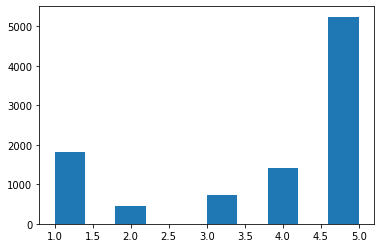

In [189]:
plt.hist(df["review_score"])
plt.show()

Remember, we have dropped the column with NaN value, but id does have some review score. hence, considering the effect using count plot of the reviews.

e:\anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

e:\anaconda\envs\myenv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='review_score', ylabel='count'>

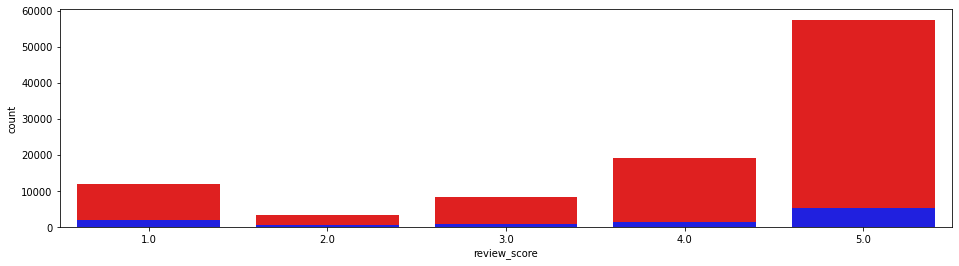

In [190]:
fig = plt.figure(figsize=(16,4))
sns.countplot(original['review_score'], color= 'red') #original data
sns.countplot(df['review_score'], color= 'blue') #after removing NaN values

Let's look out for unique values, e.g. type of payments & rates of review

In [192]:
uniquestates = df['state'].unique()
uniquestates

array(['SP', 'RN'], dtype=object)

In [193]:
uniquecity= df['city'].unique()
uniquecity

array(['sao paulo', 'são paulo'], dtype=object)

Ans, here we get to know that because of multilingual dataset we got even more duplicate rows and columns. I think its best to drop city and state name from the dataset because our order from SP only.

In [194]:
df = df.drop(['city' , 'state'], axis =1)

In [196]:
uniqueValues = df['payment_type'].unique()
uniqueValues

array(['boleto', 'credit_card', 'voucher', 'debit_card'], dtype=object)

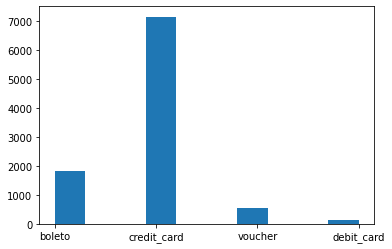

In [197]:
plt.hist(df["payment_type"])
plt.show()

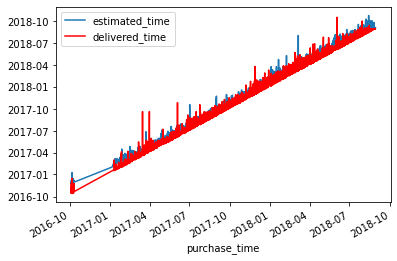

In [198]:
ax = plt.gca()

df.plot(kind='line',x='purchase_time',y='estimated_time',ax=ax)
df.plot(kind='line',x='purchase_time',y='delivered_time', color='red', ax=ax)

plt.show()

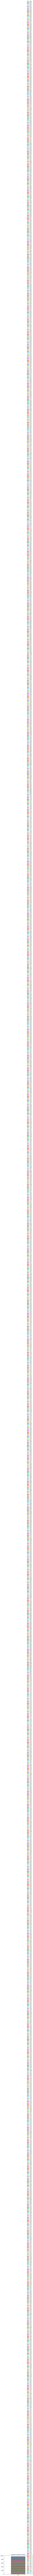

In [134]:
df.assign(dummy = 1).groupby(
  ['dummy','zip']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of orders by zip codes')

# other it'll show up as 'dummy' 
plt.xlabel('zip')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['zip'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()

Well its imporsibile to understand this stacked bar graph, but it clearly shows that olist store's users are almost spread widely, without no partiality!! Bingo people like olist store all around the SP!!!

Let's plot some maps now!!

In [199]:
import folium
from folium import plugins
import ipywidgets
import geocoder
import geopy

In [200]:
map_layer_control = folium.Map(location=[5.27438888, -73.98283055], zoom_start=2)


folium.raster_layers.TileLayer('Open Street Map').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Terrain').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Toner').add_to(map_layer_control)
folium.raster_layers.TileLayer('Stamen Watercolor').add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Positron').add_to(map_layer_control)
folium.raster_layers.TileLayer('CartoDB Dark_Matter').add_to(map_layer_control)

# add layer control to show different maps
folium.LayerControl().add_to(map_layer_control)

# display map
map_layer_control

Let's try to add markers on the map!!!

In [201]:
map_zoo = folium.Map(location=[5.27438888, -73.98283055], zoom_start=14)
address_latlng = [df.latitude, df.longitude]

# add marker to map
folium.Marker(address_latlng, popup='San Diego Zoo', tooltip='click').add_to(map)

ValueError: Location should consist of two numerical values, but 9       -23
15      -23
19      -23
22      -23
34      -23
         ..
99365   -23
99394   -23
99417   -23
99418   -23
99436   -23
Name: latitude, Length: 9651, dtype: int32 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [202]:
map1 = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations
for (index, row) in df.iterrows():
    folium.Marker(location=[df.loc['latitude'], df.loc['longitude']], 
                  popup=df.loc['name'] + ' ' + df.loc['city'] + ' ' + df.loc['state'], 
                  tooltip='click').add_to(map_airports)
    
# display map    
map1

KeyError: 'latitude'

## Conclusion 

I tried (definitly not my best, but I tired). Still, not able to put markers on the map using folium. This is All. Thank You for the chance :)